<a href="https://colab.research.google.com/github/Akramraza12349/The-Global-terrorism-data-analysis/blob/main/Akram_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width', None)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
file_path='/content/drive/MyDrive/AlmaBetter/Capstone Project/Global Terrorism Data.csv'
# creating data frame 
df=pd.read_csv(file_path,encoding='latin-1',low_memory=False)

In [148]:
# To find the top 5 rows of data frame 
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [149]:
# to find the shape of data frame 
df.shape

(181691, 135)

In [150]:
# removing the limits to show rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [151]:
# checking the data types of different columns 
df.dtypes

eventid                 int64
iyear                   int64
imonth                  int64
iday                    int64
approxdate             object
extended                int64
resolution             object
country                 int64
country_txt            object
region                  int64
region_txt             object
provstate              object
city                   object
latitude              float64
longitude             float64
specificity           float64
vicinity                int64
location               object
summary                object
crit1                   int64
crit2                   int64
crit3                   int64
doubtterr             float64
alternative           float64
alternative_txt        object
multiple              float64
success                 int64
suicide                 int64
attacktype1             int64
attacktype1_txt        object
attacktype2           float64
attacktype2_txt        object
attacktype3           float64
attacktype

In [152]:
# fiding the numbr of rows
length =len(df.index)
length


181691

In [153]:
# counting the percentage of null values in data frame  
v= df.isnull().sum(axis=0)
print((v/length)*100)

eventid                0.000000
iyear                  0.000000
imonth                 0.000000
iday                   0.000000
approxdate            94.914993
extended               0.000000
resolution            98.778145
country                0.000000
country_txt            0.000000
region                 0.000000
region_txt             0.000000
provstate              0.231712
city                   0.238867
latitude               2.507554
longitude              2.508104
specificity            0.003302
vicinity               0.000000
location              69.456385
summary               36.396409
crit1                  0.000000
crit2                  0.000000
crit3                  0.000000
doubtterr              0.000550
alternative           84.032781
alternative_txt       84.032781
multiple               0.000550
success                0.000000
suicide                0.000000
attacktype1            0.000000
attacktype1_txt        0.000000
attacktype2           96.524869
attackty

In [154]:

# creating data frame where null values are less than 30%
df_new=df.loc[:,(df.isnull().mean()*100)<30]


In [155]:
# shape of the new data frame 
df_new.shape

(181691, 48)

In [156]:
# head of the new data frame 
df_new.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,13,Unknown,NaN,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,8,Incendiary,NaN,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1


In [157]:
# tail of the new data frame 
df_new.tail()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,1,1,0,1.0,0.0,1,0,2,Armed Assault,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,Al-Shabaab,0.0,0,5,Firearms,5.0,Unknown Gun Type,1.0,2.0,-9,0.0,START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,1,1,0,1.0,0.0,1,0,3,Bombing/Explosion,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0,Russia,Muslim extremists,0.0,0,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",2.0,7.0,1,0.0,START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,1,1,1,0.0,0.0,1,0,7,Facility/Infrastructure Attack,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,160.0,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),0.0,0,8,Incendiary,18.0,Arson/Fire,0.0,0.0,1,0.0,START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,1,1,1,0.0,0.0,0,0,3,Bombing/Explosion,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,92.0,India,Unknown,0.0,0,6,Explosives,7.0,Grenade,0.0,0.0,-9,0.0,START Primary Collection,-9,-9,0,-9
181690,201712310032,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,1.0,0,1,1,1,0.0,0.0,0,0,3,Bombing/Explosion,20,Unknown,NaN,NaN,Unknown,Unknown,160.0,Philippines,Unknown,0.0,0,6,Explosives,16.0,Unknown Explosive Type,0.0,0.0,0,0.0,START Primary Collection,-9,-9,0,-9


In [158]:
# Getting the info of new data frame after dropping the columns
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 48 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181257 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  crit1             181691 non-null  int64  
 16  crit2             18

In [159]:
df_new.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,guncertain1,individual,weaptype1,weapsubtype1,nkill,nwound,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,181690.000000,181691.000000,181691.000000,181691.000000,181691.000000,171318.000000,180132.000000,181311.000000,181691.000000,181691.000000,160923.000000,171378.000000,165380.000000,181691.000000,181513.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,0.137773,0.889598,0.036507,3.247547,8.439719,46.971474,127.686441,0.081440,0.002950,6.447325,11.117162,2.403272,3.167668,-0.544556,0.059054,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.344663,0.313391,0.187549,1.915772,6.653838,30.953357,89.299120,0.273511,0.054234,2.173435,6.495612,11.545741,35.949392,3.122889,0.461244,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,22.000000,83.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,4.000000,35.000000,101.000000,0.000000,0.000000,6.000000,12.000000,0.000000,0.000000,1.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,14.000000,74.000000,173.000000,0.000000,0.000000,6.000000,16.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,22.000000,113.000000,1004.000000,1.000000,1.000000,13.000000,31.000000,1570.000000,8191.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [160]:
df_new.columns = ['event_id', 'Year', 'Month', 'Day', 'extended', 'country_id',
       'Country', 'region_id', 'Region', 'provstate', 'City', 'Latitude',
       'Longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'Multiple', 'Success', 'Suicide', 'attacktype1',
       'attack_type', 'targtype1', 'targt_type', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'Nationolity',
       'Group', 'guncertain1', 'Individual', 'weaptype1', 'weapon_type',
       'weapsubtype1', 'weapsubtype1_txt', 'Deaths','Wounds', 'Property',
       'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY']

In [161]:
df_new=df_new[['event_id','Year', 'Month', 'Day', 'extended', 'Country', 'Region',
         'City', 'Latitude', 'Longitude', 'Multiple', 'Success',
         'Suicide', 'attack_type', 'targt_type', 'Nationolity', 'Group',
         'Individual', 'weapon_type', 'Deaths','Wounds']]

In [162]:

df_new.shape

(181691, 21)

In [163]:
df_new.head()

,event_id,Year,Month,Day,extended,Country,Region,City,Latitude,Longitude,Multiple,Success,Suicide,attack_type,targt_type,Nationolity,Group,Individual,weapon_type,Deaths,Wounds
0,197000000001,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,0.0,1,0,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,0,Unknown,1.0,0.0
1,197000000002,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,0.0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,0,Unknown,0.0,0.0
2,197001000001,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,0.0,1,0,Assassination,Journalists & Media,United States,Unknown,0,Unknown,1.0,0.0
3,197001000002,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,0.0,1,0,Bombing/Explosion,Government (Diplomatic),United States,Unknown,0,Explosives,NaN,NaN
4,197001000003,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,0.0,1,0,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,0,Incendiary,NaN,NaN


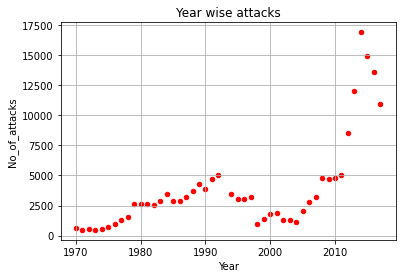

In [164]:
# year wise attacks from 1970 to 2017
df_new_year_wise=df_new.groupby(['Year']).size().reset_index(name='No_of_attacks').sort_values('Year',ascending=False)
df_new_year_wise.plot(x='Year',y='No_of_attacks',grid=True,kind='scatter',color='red',title='Year wise attacks')



In [165]:
# different year which weapon has been used most
df_year_wise_weapon=df_new.groupby(['Year','weapon_type']).size().reset_index(name='counts').sort_values('counts',ascending=False)
df_year_wise_weapon.head(10)
#df_new_year_wise.plot(x='Year',y='No_of_attacks',grid=True,kind='scatter',color='red',title='Year wise attacks')


,Year,weapon_type,counts
363,2014,Explosives,9521
373,2015,Explosives,8380
382,2016,Explosives,7603
354,2013,Explosives,7266
391,2017,Explosives,5465
344,2012,Explosives,5412
365,2014,Firearms,5040
374,2015,Firearms,3953
355,2013,Firearms,3660
383,2016,Firearms,3481


In [166]:
# Filling null values with mean of Death columns
df_new['Deaths'].fillna(int(df_new['Deaths'].mean()),inplace=True)
df_new.head()

,event_id,Year,Month,Day,extended,Country,Region,City,Latitude,Longitude,Multiple,Success,Suicide,attack_type,targt_type,Nationolity,Group,Individual,weapon_type,Deaths,Wounds
0,197000000001,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,0.0,1,0,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,0,Unknown,1.0,0.0
1,197000000002,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,0.0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,0,Unknown,0.0,0.0
2,197001000001,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,0.0,1,0,Assassination,Journalists & Media,United States,Unknown,0,Unknown,1.0,0.0
3,197001000002,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,0.0,1,0,Bombing/Explosion,Government (Diplomatic),United States,Unknown,0,Explosives,2.0,NaN
4,197001000003,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,0.0,1,0,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,0,Incendiary,2.0,NaN


In [167]:
# data frame containing year wise attacks and deaths
df_year_wise_deaths=df_new.groupby(['Year','Deaths']).size().reset_index(name='Attacks').sort_values('Year',ascending=True)
df_year_wise_deaths.head()

,Year,Deaths,Attacks
0,1970,0.0,544
1,1970,1.0,49
2,1970,2.0,50
3,1970,3.0,2
4,1970,4.0,2


In [168]:
#New data frame  to calculate the deaths in each attack
df_year_wise_deaths['Total_deaths']=df_year_wise_deaths.Deaths*df_year_wise_deaths.Attacks
df_year_wise_deaths.head(20)


,Year,Deaths,Attacks,Total_deaths
0,1970,0.0,544,0.0
1,1970,1.0,49,49.0
2,1970,2.0,50,100.0
3,1970,3.0,2,6.0
4,1970,4.0,2,8.0
5,1970,5.0,1,5.0
6,1970,7.0,1,7.0
7,1970,36.0,1,36.0
8,1970,47.0,1,47.0
16,1971,25.0,1,25.0


In [169]:
# data fame containing year wise total deaths
df_cum_death=df_year_wise_deaths.groupby('Year')['Total_deaths'].sum().reset_index(name='Total_deaths')
df_cum_death.head()


,Year,Total_deaths
0,1970,258.0
1,1971,301.0
2,1972,654.0
3,1973,468.0
4,1974,655.0


<Figure size 1800x648 with 0 Axes>

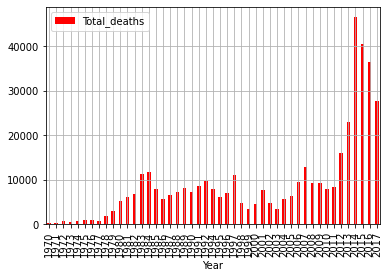

In [172]:
plt.figure(figsize=(25,9))
df_cum_death.plot(x='Year',y='Total_deaths',kind='bar',grid=True,color='red')
plt.show()

In [135]:
# Data frame of India and year wise deaths
df_India=df_new[df_new['Country']=='India']
df_cum_death_india=df_India.groupby('Year')['Deaths'].sum().reset_index(name='Total_Deaths')
df_cum_death_india

,Year,Total_Deaths
0,1972,0.0
1,1975,4.0
2,1976,0.0
3,1977,0.0
4,1979,37.0
5,1980,17.0
6,1981,32.0
7,1982,64.0
8,1983,75.0
9,1984,203.0


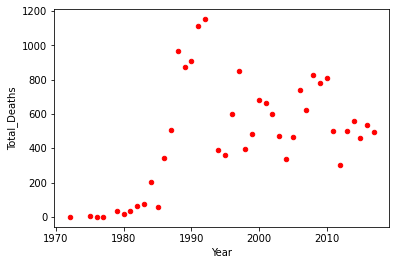

In [138]:
df_cum_death_india.plot(x='Year',y='Total_Deaths',kind='scatter',color='r')


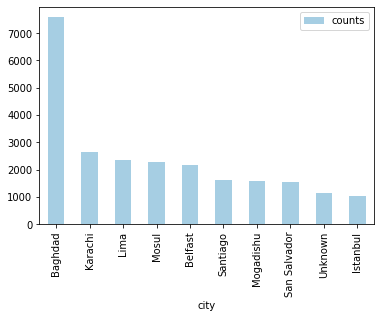

In [ ]:
 # bar plot of 10 cities which were attacked most
df_cities.head(10).plot(x='city',y='counts',kind='bar',stacked=True,colormap='Paired')

In [ ]:
# top 10 target type 
df_target_subject=df_new.groupby('targsubtype1_txt').size().reset_index(name='counts').sort_values('counts',ascending=False)
df_target_subject.head(10)



,targsubtype1_txt,counts
108,Unnamed Civilian/Unspecified,11596
76,Police Security Forces/Officers,11178
52,Military Unit/Patrol/Convoy,8277
49,"Military Personnel (soldiers, troops, officers...",7963
28,"Government Personnel (excluding police, military)",6610
110,Village/City/Town/Suburb,6542
78,Politician or Political Party Movement/Meeting...,6306
73,"Police Building (headquarters, station, school)",5907
46,Military Barracks/Base/Headquarters/Checkpost,5211
75,Police Patrol (including vehicles and convoys),5105


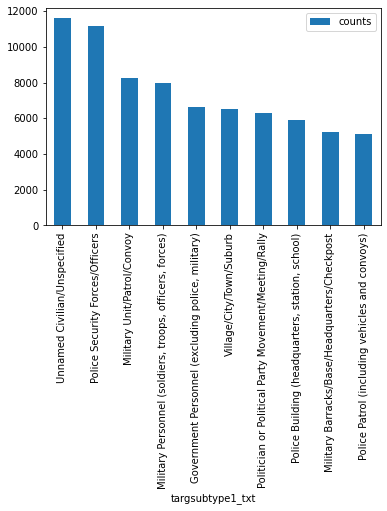

In [ ]:
# bar plot of the top 10 target type
df_target_subject.head(10).plot(x='targsubtype1_txt',y='counts',kind='bar')


In [ ]:
df_attack_type=df_new.groupby('attacktype1_txt').size().reset_index(name='counts').sort_values('counts',ascending=False)
df_attack_type.head(10)


,attacktype1_txt,counts
2,Bombing/Explosion,88255
0,Armed Assault,42669
1,Assassination,19312
6,Hostage Taking (Kidnapping),11158
3,Facility/Infrastructure Attack,10356
8,Unknown,7276
7,Unarmed Assault,1015
5,Hostage Taking (Barricade Incident),991
4,Hijacking,659


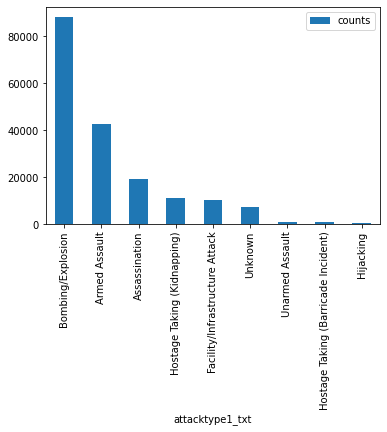

In [ ]:
# bar plot of attack types
df_attack_type.head(10).plot(x='attacktype1_txt',y='counts',kind='bar')

In [ ]:
import matplotlib.pyplot as plt


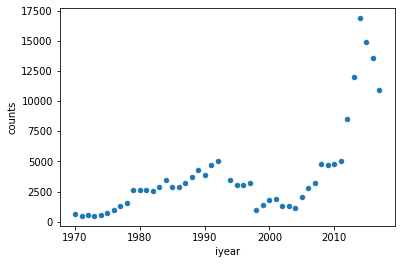

In [ ]:
df_event_year=df_new.groupby(['iyear']).size().reset_index(name='counts').sort_values('iyear',ascending= True)
df_event_year.head(20)
df_event_year.plot(x='iyear',y='counts',kind='scatter')


In [ ]:
df_new.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,13,Unknown,NaN,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,8,Incendiary,NaN,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1


In [ ]:
df_year_wise.head(10)

,iyear,gname,counts
0,1970,1st of May Group,3
59,1970,Right-wing extremists,2
58,1970,Revolutionary Force Seven,5
57,1970,Revolutionary Force 9,3
55,1970,Revolutionary Armed Forces- Argentina (FAR-A),2
54,1970,Revolutionary Action Party,3
53,1970,Rebel Armed Forces of Guatemala (FAR),3
52,1970,Quartermoon Society,1
60,1970,SFT,1
51,1970,Puerto Rican Resistance Movement,2


In [ ]:
df_year_wise=df_new.groupby(['iyear','gname']).size().reset_index(name='counts').sort_values('iyear',ascending=True)
df_year_wise.groupby('iyear').head(10)

,iyear,gname,counts
0,1970,1st of May Group,3
59,1970,Right-wing extremists,2
58,1970,Revolutionary Force Seven,5
57,1970,Revolutionary Force 9,3
55,1970,Revolutionary Armed Forces- Argentina (FAR-A),2
128,1971,Regulators,1
127,1971,RYF,3
126,1971,Quartermoon Society,1
125,1971,Puerto Rican Resistance Movement,1
124,1971,Puerto Rican Nationalists,7


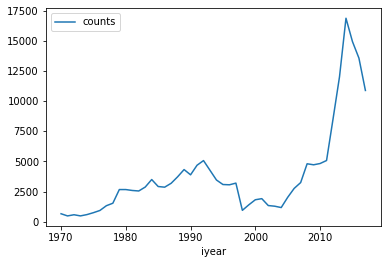

In [ ]:
df_year_wise=df_new.groupby(['iyear']).size().reset_index(name='counts').sort_values('iyear',ascending=True)
df_year_wise.plot(x='iyear',y='counts')

In [ ]:
df_year_wise.max


<bound method DataFrame.max of     iyear  counts
0    1970     651
1    1971     471
2    1972     568
3    1973     473
4    1974     581
5    1975     740
6    1976     923
7    1977    1319
8    1978    1526
9    1979    2662
10   1980    2662
11   1981    2586
12   1982    2544
13   1983    2870
14   1984    3495
15   1985    2915
16   1986    2860
17   1987    3183
18   1988    3721
19   1989    4324
20   1990    3887
21   1991    4683
22   1992    5071
23   1994    3456
24   1995    3081
25   1996    3058
26   1997    3197
27   1998     934
28   1999    1395
29   2000    1814
30   2001    1906
31   2002    1333
32   2003    1278
33   2004    1166
34   2005    2017
35   2006    2758
36   2007    3242
37   2008    4805
38   2009    4721
39   2010    4826
40   2011    5076
41   2012    8522
42   2013   12036
43   2014   16903
44   2015   14965
45   2016   13587
46   2017   10900>